In [1]:
plt = plotter()

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import jax
import jax.lax as lax
import jax.numpy as np

In [4]:
from valjax import homotopy

### Function

In [5]:
func = lambda x, p: x**2 - 2*p*x + 1

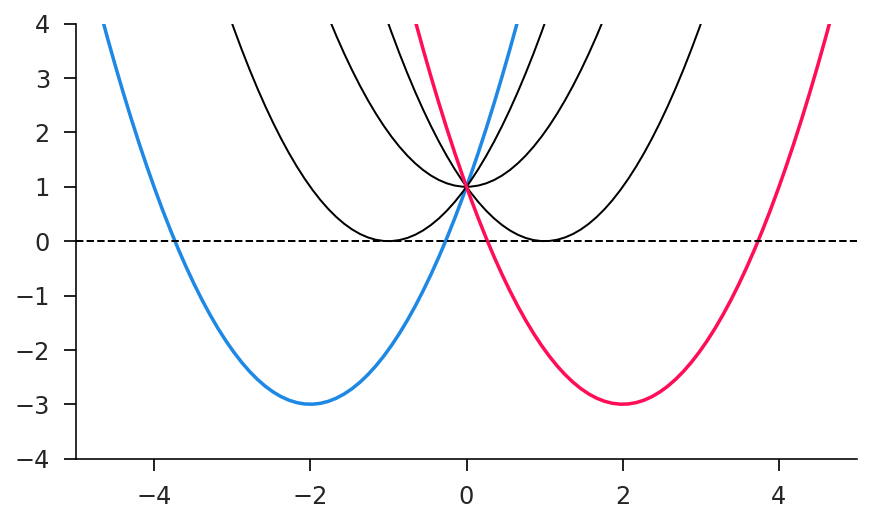

In [6]:
xgrid = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(xgrid, func(xgrid, -2))
ax.plot(xgrid, func(xgrid, -1), color='k', linewidth=1)
ax.plot(xgrid, func(xgrid, 0), color='k', linewidth=1)
ax.plot(xgrid, func(xgrid, 1), color='k', linewidth=1)
ax.plot(xgrid, func(xgrid, 2))
ax.plot(xgrid, np.zeros_like(xgrid), color='k', linestyle='--', linewidth=1)
ax.set_ylim(-4, 4); ax.set_xlim(-5, 5);

### Path

In [7]:
func1 = lambda x, p: func(x, p) + 0.03j

In [8]:
p0 = np.array([-2.0 + 0.0j])
p1 = np.array([2.0 + 0.0j])
x0a = p0 - np.sqrt(p0**2-1)
x0b = p0 + np.sqrt(p0**2-1)

In [9]:
xp1, pp1, tp1 = homotopy(func1, (p0, p1), x0a, K=500)
xp2, pp2, tp2 = homotopy(func1, (p0, p1), x0b, K=500)

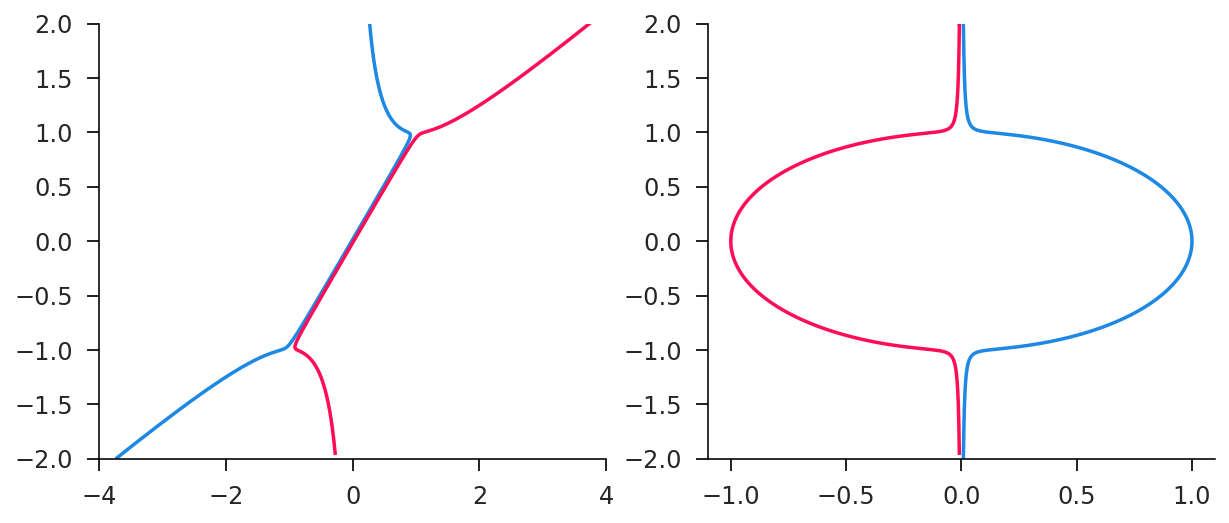

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(xp1.real, pp1.real)
ax0.plot(xp2.real, pp2.real)
ax1.plot(xp1.imag, pp1.real)
ax1.plot(xp2.imag, pp2.real)
ax0.set_ylim(-2, 2); ax1.set_ylim(-2, 2)
ax0.set_xlim(-4, 4); ax1.set_xlim(-1.1, 1.1);

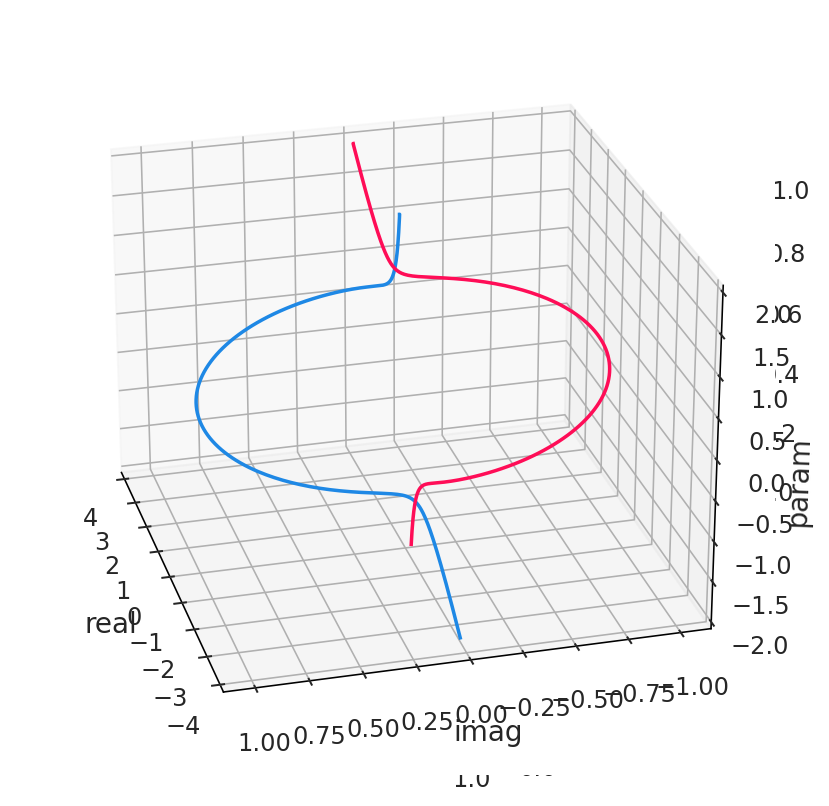

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax = plt.axes(projection='3d')
ax.plot3D(xp1.real.flatten(), xp1.imag.flatten(), pp1.real.flatten())
ax.plot3D(xp2.real.flatten(), xp2.imag.flatten(), pp2.real.flatten())
ax.set_zlim(-2, 2)
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('param')
ax.view_init(25, 165);